<a href="https://colab.research.google.com/github/aymericcousaert/analisis-tweets/blob/master/visualizaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
<a id='top1'></a>
# <center>75.06/95.58 Organización de Datos - TP 1

<div style="border-bottom:3px solid #000;"> 


  
<a href='#section1'>**Step 1:**</a>   Import de librerias y carga de csv    
<a href='#section2'>**Step 2:**</a>   Limpieza de datos  
<a href='#section3'>**Step 3:**</a>   Análisis geográfico  
<a href='#section3'>**Step 4:**</a>   Análisis geográfico segun el target  
<a href='#section4'>**Step 5:**</a>   Análisis de texto segun el target


In [0]:
!pip install squarify

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
<a id='section1'></a>

<div style="border-bottom:3px solid #000;"> 
<div align="left"><h2>Step 1: Import de librerias y carga de csv para formar un dataset</h2></div>
<div align="right">(return to <a href='#top1'><b>Top</b></a>)</div>
</div>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify 
import io
import seaborn as sns
import re
import nltk.corpus
import urllib
import requests
import plotly.express as px
import plotly.graph_objects as go
import pylab as pl
from itertools import cycle, islice
from matplotlib import cm
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
from google.colab import files        # cargamos los archivos train.csv y worldcities.csv
data_to_load = files.upload()

Saving train.csv to train.csv
Saving worldcities.csv to worldcities.csv


In [0]:
# creamos los dataframes
df = pd.read_csv(io.BytesIO(data_to_load['train.csv']))
cityAndCountries = pd.read_csv(io.BytesIO(data_to_load['worldcities.csv']))

In [0]:
pd.options.mode.chained_assignment = None           # algunos seteos para lograr mejor lectura del df
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 150)  
plt.rcParams['figure.figsize'] = [17, 12]

In [0]:
df.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1
6,10,NaN,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in the woods...,1
8,14,NaN,NaN,There's an emergency evacuation happening now in the building across the street,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our area...,1


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


El df contiene 7613 registros distribuidos en 5 columnas. Se observan aprox 60 valores nulos en la columna **keyword** y mas de 2500 en la columna **location**

In [0]:
# evaluamos si las clases del target estan balanceadas
df.target.value_counts(normalize=True)

0    0.57034
1    0.42966
Name: target, dtype: float64

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
<a id='section2'></a>

<div style="border-bottom:3px solid #000;"> 
<div align="left"><h2>Step 2: Limpieza de datos</h2></div>
<div align="right">(return to <a href='#top1'><b>Top</b></a>)</div>
</div>



# Df tweetclean

In [0]:
# limpiamos la columna text eliminando algunos caracteres y la guardamos en 'text_clean'
df_tweetclean = df
df_tweetclean['text_clean'] = df['text'].str.lower()
df_tweetclean['text_clean'] = df['text_clean'].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
df_tweetclean['text_clean'] = df['text_clean'].apply(lambda elem: re.sub(r"\d+", "", elem))

In [0]:
stop = stopwords.words('english')

In [0]:
# eliminamos stopwords
df_tweetclean['text_clean'] = df_tweetclean['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [0]:
df_tweetclean['text_clean'] = df_tweetclean['text_clean'].apply(lambda x: word_tokenize(x))
df_tweetclean.head(20)

,id,keyword,location,text,target,text_clean
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,"[deeds, reason, earthquake, may, allah, forgive, us]"
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,"[residents, asked, shelter, place, notified, officers, evacuation, shelter, place, orders, expected]"
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1,"[people, receive, wildfires, evacuation, orders, california]"
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,"[got, sent, photo, ruby, alaska, smoke, wildfires, pours, school]"
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1,"[rockyfire, update, california, hwy, closed, directions, due, lake, county, fire, cafire, wildfires]"
6,10,NaN,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1,"[flood, disaster, heavy, rain, causes, flash, flooding, streets, manitou, colorado, springs, areas]"
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in the woods...,1,"[im, top, hill, see, fire, woods]"
8,14,NaN,NaN,There's an emergency evacuation happening now in the building across the street,1,"[theres, emergency, evacuation, happening, building, across, street]"
9,15,NaN,NaN,I'm afraid that the tornado is coming to our area...,1,"[im, afraid, tornado, coming, area]"


In [0]:
def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text

In [0]:
# unificamos palabras que poseen la misma raiz
df_tweetclean['text_clean'] = df_tweetclean['text_clean'].apply(lambda x: word_lemmatizer(x))
df_tweetclean.head()

,id,keyword,location,text,target,text_clean
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,"[deed, reason, earthquake, may, allah, forgive, u]"
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,"[resident, asked, shelter, place, notified, officer, evacuation, shelter, place, order, expected]"
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1,"[people, receive, wildfire, evacuation, order, california]"
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,"[got, sent, photo, ruby, alaska, smoke, wildfire, pours, school]"


In [0]:
# generamos una columna que indica con un 1 si el texto posee un link a un enlace externo
df_tweetclean['link'] = df_tweetclean['text'].apply(lambda x: 1 if (x.find('http') != -1) else 0)
df_tweetclean.sample(20)

,id,keyword,location,text,target,text_clean,link
4092,5817,hail,Between Dire and Radiant,Hail! [pic] ÛÓ https://t.co/B7omJ7U3EI,0,"[hail, pic]",1
4349,6175,hijack,NaN,@RickyBonesSXM fuck u2 specially there new Shit. First they hijack itunes now all sirius chan. fuck off already haha just sayin,0,"[fuck, u, specially, new, shit, first, hijack, itunes, sirius, chan, fuck, already, haha, sayin]",0
4402,6258,hijacking,NaN,Û÷Good SamaritansÛª shot in horror hijacking JOHANNESBURG. &amp;mdash; Four men were shot dead in Bronville Free StateÛ_ http://t.co/6jjvCDN4TI,1,"[good, samaritan, shot, horror, hijacking, johannesburg, ampmdash, four, men, shot, dead, bronville, free, state]",1
4567,6493,injuries,"Milton Keynes, England",If you're slating @gpaulista5 for @JackWilshere's injury then you're a disgrace to the #AFC fan base. Injuries happen you cunts!,0,"[youre, slating, injury, youre, disgrace, afc, fan, base, injury, happen, cunt]",0
3204,4598,emergency%20services,NaN,@chillimik @HushLegs haha ??????..Are you really comparing yourselves to the emergency services! Thats brilliant! talk about up your own arse!,0,"[haha, really, comparing, emergency, service, thats, brilliant, talk, arse]",0
251,356,annihilation,CA physically- Boston Strong?,U.S National Park Services Tonto National Forest: Stop the Annihilation of the Salt River Wild Horse... https://t.co/sW1sBua3mN via @Change,1,"[u, national, park, service, tonto, national, forest, stop, annihilation, salt, river, wild, horse, via]",1
204,289,ambulance,"Hannover, Germany",Twelve feared killed in Pakistani air ambulance helicopter crash http://t.co/X2Qsjod40u #worldnews,1,"[twelve, feared, killed, pakistani, air, ambulance, helicopter, crash, worldnews]",1
3361,4812,evacuation,NaN,FAAN orders evacuation of abandoned aircraft at MMA: FAAN noted that the action had become necessary due to re... http://t.co/ZUqgvJnEQA,1,"[faan, order, evacuation, abandoned, aircraft, mma, faan, noted, action, become, necessary, due]",1
1938,2786,curfew,"Elkhart, IN",Had to cancel my cats doctor appointment because she decided to go out and play and not come home by curfew ...,0,"[cancel, cat, doctor, appointment, decided, go, play, come, home, curfew]",0
5813,8296,rubble,NaN,@accionempresa ChinaÛªs stock market crash this summer has sparked interest from bargain hunt... http://t.co/s0Eyq1wEHE @gerenciatodos å¨,1,"[china, stock, market, crash, summer, sparked, interest, bargain, hunt]",1


In [0]:
# hacemos lo mismo buscando contactos con el caracter @
df_tweetclean['contact'] = df_tweetclean['text'].apply(lambda x: 1 if (x.find('@') != -1) else 0)
df_tweetclean.sample(10)

,id,keyword,location,text,target,text_clean,link,contact
285,418,apocalypse,Albuquerque,And so it begins.. day one of the snow apocalypse,1,"[begin, day, one, snow, apocalypse]",0,0
3846,5473,flames,NaN,#SBNation #Flames What Makes a Good Penalty Killer? http://t.co/xYi5fDacxO http://t.co/SjtvzgGcXU,0,"[sbnation, flame, make, good, penalty, killer]",1,0
920,1332,blown%20up,L/S/Z/L/T/H/C/H/R/A/S/C,@Papcrdoll and I s2g if my mentions get blown up over MY choice I will deactivate and leave for good. RESPECT MY CHOICES.,0,"[sg, mention, get, blown, choice, deactivate, leave, good, respect, choice]",0,1
4462,6345,hostages,NaN,#hot C-130 specially modified to land in a stadium and rescue hostages in Iran in 1980 http://t.co/W0EXzAD5Gc #prebreak #best,1,"[hot, c, specially, modified, land, stadium, rescue, hostage, iran, prebreak, best]",1,0
5353,7641,pandemonium,the Refrigerator,Photo: deadgirltalking: unfortunemelody: jaylenejoybeligan: tarynel: dredougie: santanico-pandemonium:... http://t.co/PvKgo79JnI,0,"[photo, deadgirltalking, unfortunemelody, jaylenejoybeligan, tarynel, dredougie, santanicopandemonium]",1,0
3250,4671,engulfed,NaN,Men escape car engulfed in flames in Parley's Canyon crews investigating cause - http://t.co/tFan6qq2Ys http://t.co/rAkwWritPo,1,"[men, escape, car, engulfed, flame, parley, canyon, crew, investigating, cause]",1,0
352,504,army,twitch.tv/naturalemblem26,Seeing that army of whitewalkers was the very first thing that has slightly intrigued me on GoT so far,0,"[seeing, army, whitewalkers, first, thing, slightly, intrigued, got, far]",0,0
6849,9816,trauma,Your notifications,games that I really hope to see in AGDQ: Trauma Center Second Opinion Kororinpa Marble Mania TLoZ Oracle of Ages Metroid II,0,"[game, really, hope, see, agdq, trauma, center, second, opinion, kororinpa, marble, mania, tloz, oracle, age, metroid, ii]",0,0
1501,2164,catastrophic,NaN,The Catastrophic Effects of Hiroshima and Nagasaki Atomic Bombings Still Being Felt Today http://t.co/oU1M9chznq,1,"[catastrophic, effect, hiroshima, nagasaki, atomic, bombing, still, felt, today]",1,0
7084,10146,upheaval,INDIA,Lyf needs quality and a certain sense of security. Being with a person you can't trust can only cause stress and emotional upheaval.,0,"[lyf, need, quality, certain, sense, security, person, cant, trust, cause, stress, emotional, upheaval]",0,0


In [0]:
# buscamos #
df_tweetclean['hashtag'] = df_tweetclean['text'].apply(lambda x: 1 if (x.find('#') != -1) else 0)
df_tweetclean.sample(10)

,id,keyword,location,text,target,text_clean,link,contact,hashtag
3777,5365,fire%20truck,"Woodcreek HS, Roseville, CA",Your PSA for the day: If a fire truck is behind you with lights going MOVE OVER!!! so they can get to their call.,0,"[psa, day, fire, truck, behind, light, going, move, get, call]",0,0,0
3388,4850,evacuation,"Tri-Cities, Wash.",Evacuation order lifted for town of Roosevelt: http://t.co/EDyfo6E2PU http://t.co/M5KxLPKFA1,1,"[evacuation, order, lifted, town, roosevelt]",1,0,0
6587,9432,survivors,Shanghai,Survivors of Shanghai Ghetto reunite after 70 years - http://t.co/1Ki8LgVAy4 #Shanghai #China #??,0,"[survivor, shanghai, ghetto, reunite, year, shanghai, china]",1,0,1
7256,10387,whirlwind,Somewhere between here & there,I stand alone\ndon't piss and moan\nabout my choices made\nIf I must reap the whirlwind so be it\nI'll do so with demeanor calm and staid,0,"[stand, alonedont, piss, moanabout, choice, madeif, must, reap, whirlwind, itill, demeanor, calm, staid]",0,0,0
5314,7588,outbreak,kano,Families to sue over Legionnaires: More than 40 families affected by the fatal outbreak of Legionnaires' disea... http://t.co/NQ77EfMF88,1,"[family, sue, legionnaire, family, affected, fatal, outbreak, legionnaire, disea]",1,0,0
6325,9041,stretcher,3???2???????,ÛÏStretcher in 5 min // Speaker DeckÛ http://t.co/7qPG80uD7v,0,"[stretcher, min, speaker, deck]",1,0,0
4598,6540,injury,NaN,JOBOOZOSO: USAT usatoday_nfl Michael Floyd's hand injury shouldn't devalue his fantasy stock http://t.co/DGkmUEoAxZ,0,"[joboozoso, usat, usatodaynfl, michael, floyds, hand, injury, shouldnt, devalue, fantasy, stock]",1,0,0
4335,6156,hijack,NaN,Criminals Who Hijack Lorries And Buses Arrested In Enugu: According to the Nigerian Police Force... http://t.co/FfKcj8pfj2 Via @Music212,1,"[criminal, hijack, lorry, bus, arrested, enugu, according, nigerian, police, force, via]",1,1,0
1828,2628,crashed,"Lincoln, NE",1 ÛÒ The bug that almost crashed the Euro - http://t.co/KgkZ50Q8TK,1,"[bug, almost, crashed, euro]",1,0,0
2416,3475,derailed,"Enterprise, Alabama",Has #IdentityTheft Derailed Your #TaxReturn? \n8 Steps for Cleaning Up an #IdentityTheft Train Wreck. #CRI\nhttp://t.co/gxQWD1qZBd,0,"[identitytheft, derailed, taxreturn, step, cleaning, identitytheft, train, wreck, cri]",1,0,1


In [0]:
# eliminamos los caracteres %20 que forman los bigramas en las keywords
df_tweetclean['keyword'] = df_tweetclean.keyword.str.replace('%20', '_')

In [0]:
# cambiamos todas las keywords a minuscula
df_tweetclean['keyword'] = df_tweetclean.keyword.str.lower()

#![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
<a id='section2'></a>

<div style="border-bottom:3px solid #000;"> 
<div align="left"><h2>Step 3: Análisis geográfico</h2></div>
<div align="right">(return to <a href='#top1'><b>Top</b></a>)</div>
</div>

#Df location

In [0]:
# comenzamos el analisis geografico
df_location = df
df_location = df_location.loc[~df_location['location'].isnull()]
df_location.location.value_counts().head(10)

USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Name: location, dtype: int64

In [0]:
# Unificamos los nombres de algunas localidades
df_location['location'] = df_location.location.apply(lambda x: x.lower())
df_location.loc[df_location.location == 'new York, ny','location'] = 'new york'
df_location.loc[df_location.location == 'nyc','location'] = 'new york'
df_location.loc[df_location.location == 'ny','location'] = 'new york'
df_location.loc[df_location.location == 'new york city','location'] = 'new york'
df_location.loc[df_location.location == 'us','location'] = 'united states'
df_location.loc[df_location.location == 'usa','location'] = 'united states'
df_location.loc[df_location.location == 'california','location'] = 'united states'
df_location.loc[df_location.location == 'southern california','location'] = 'united states'
df_location.loc[df_location.location == 'orange county','location'] = 'united states'
df_location.loc[df_location.location == 'u.s.a','location'] = 'united states'
df_location.loc[df_location.location == 'ca','location'] = 'united states'
df_location.loc[df_location.location == 'san francisco bay area','location'] = 'san francisco'
df_location.loc[df_location.location == 'uk','location'] = 'united kingdom'

In [0]:
df_location.loc[df_location.location == 'ss','location'] = np.nan
df_location.loc[df_location.location == 'everywhere','location'] = np.nan
df_location.loc[df_location.location == 'earth','location'] = np.nan
df_location.loc[df_location.location == '304','location'] = np.nan
df_location.loc[df_location.location == 'world','location'] = np.nan
df_location.loc[df_location.location == 'worldwide','location'] = np.nan
df_location.loc[df_location.location == '??????','location'] = np.nan
df_location.loc[df_location.location == 'pedophile hunting ground','location'] = np.nan
df_location.loc[df_location.location == 'planet earth','location'] = np.nan
df_location.loc[df_location.location == 'global','location'] = np.nan
df_location.loc[df_location.location == 'in the word of god','location'] = np.nan
df_location.loc[df_location.location == '?','location'] = np.nan
df_location.loc[df_location.location == 'mad as hell','location'] = np.nan
df_location.loc[df_location.location == '??','location'] = np.nan
df_location.loc[df_location.location == '?????','location'] = np.nan
df_location.loc[df_location.location == 'happily married with 2 kids','location'] = np.nan
df_location.loc[df_location.location == 'south','location'] = np.nan
df_location.loc[df_location.location == 'world wide','location'] = np.nan

df_location = df_location.loc[~df_location['location'].isnull()]

In [0]:
df_location.loc[:,'location'] = df_location['location'].apply(lambda x: x.split(',', 1)[0])
df_location.loc[:,'location'] = df_location['location'].apply(lambda x: x.title())

In [0]:
df_location.shape  # en la limpieza por location se pierden aprox 150 registros

(4934, 9)

In [0]:
# filtramos del dataset auxiliar las ciudades con poblacion mayor a 200mil para acotar los registros
cityAndCountries = cityAndCountries.loc[cityAndCountries.population > 200000,]


In [0]:
df_citiescountries = cityAndCountries[['city_ascii','country','population']]
df_citiescountries.columns = ['location', 'country','population']  # nos quedamos con estas columnas
df_citiescountries.head()

,location,country,population
39,Sanaa,Yemen,2008000.0
42,Hajjah,Yemen,208287.0
43,Ibb,Yemen,234837.0
44,Al Hudaydah,Yemen,780000.0
47,Taizz,Yemen,751000.0


In [0]:
# hacemos un merge left para conservar todos los datos de df_location y agregar las que matchean de df_citiescountries
df_location = df_location.merge(df_citiescountries, on='location', how='left') 
df_location.head()

,id,keyword,location,text,target,text_clean,link,contact,hashtag,country,population
0,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C,1,"[wholesale, market, ablaze]",1,1,0,United Kingdom,2285000.0
1,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C,1,"[wholesale, market, ablaze]",1,1,0,United States,744189.0
2,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw,0,"[always, try, bring, heavy, metal, rt]",1,0,1,NaN,NaN
3,50,ablaze,Africa,#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi,1,"[africanbaze, breaking, newsnigeria, flag, set, ablaze, aba]",1,0,1,NaN,NaN
4,52,ablaze,Philadelphia,Crying out for more! Set me ablaze,0,"[cry, set, ablaze]",0,0,0,United States,5637884.0


In [0]:
df_location.shape

(5065, 11)

In [0]:
df_location = df_location.drop_duplicates(subset=['text'], keep=False)  # eliminamos duplicados

In [0]:
# unificamos las columnas
df_location.loc[df_location.location.isin(df_citiescountries.country), 'country'] = df_location.loc[df_location.location.isin(df_citiescountries.country), 'location']
df_location.loc[df_location.location.isin(df_citiescountries.location), 'city'] = df_location.loc[df_location.location.isin(df_citiescountries.location), 'location']

In [0]:
df_location.head(100)

,id,keyword,location,text,target,text_clean,link,contact,hashtag,country,population,city
2,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw,0,"[always, try, bring, heavy, metal, rt]",1,0,1,NaN,NaN,NaN
3,50,ablaze,Africa,#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi,1,"[africanbaze, breaking, newsnigeria, flag, set, ablaze, aba]",1,0,1,NaN,NaN,NaN
4,52,ablaze,Philadelphia,Crying out for more! Set me ablaze,0,"[cry, set, ablaze]",0,0,0,United States,5637884.0,Philadelphia
7,54,ablaze,Pretoria,@PhDSquares #mufc they've built so much hype around new acquisitions but I doubt they will set the EPL ablaze this season.,0,"[mufc, theyve, built, much, hype, around, new, acquisition, doubt, set, epl, ablaze, season]",0,1,1,South Africa,1338000.0,Pretoria
8,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3ImaomknnA,1,"[inec, office, abia, set, ablaze]",1,0,0,NaN,NaN,NaN
9,57,ablaze,Paranaque City,Ablaze for you Lord :D,0,"[ablaze, lord]",0,0,0,NaN,NaN,NaN
11,62,ablaze,Milky Way,Had an awesome time visiting the CFC head office the ancop site and ablaze. Thanks to Tita Vida for taking care of us ??,0,"[awesome, time, visiting, cfc, head, office, ancop, site, ablaze, thanks, tita, vida, taking, care, u]",0,0,0,NaN,NaN,NaN
12,66,ablaze,Greensboro,How the West was burned: Thousands of wildfires ablaze in California alone http://t.co/vl5TBR3wbr,1,"[west, burned, thousand, wildfire, ablaze, california, alone]",1,0,0,United States,335588.0,Greensboro
14,71,ablaze,England.,First night with retainers in. It's quite weird. Better get used to it; I have to wear them every single night for the next year at least.,0,"[first, night, retainer, quite, weird, better, get, used, wear, every, single, night, next, year, least]",0,0,0,NaN,NaN,NaN
15,73,ablaze,Sheffield Township,Deputies: Man shot before Brighton home set ablaze http://t.co/gWNRhMSO8k,1,"[deputy, man, shot, brighton, home, set, ablaze]",1,0,0,NaN,NaN,NaN


#![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
<a id='section2'></a>

<div style="border-bottom:3px solid #000;"> 
<div align="left"><h2>Step 4: Análisis geográfico segun el target</h2></div>
<div align="right">(return to <a href='#top1'><b>Top</b></a>)</div>
</div>

# Pregunta 1

In [0]:
# top ten de paises con mayor cantidad de tweets generados
data = df_location.country.value_counts().head(10)
data.head()

United States     953
Canada            122
United Kingdom    118
India              80
Australia          70
Name: country, dtype: int64

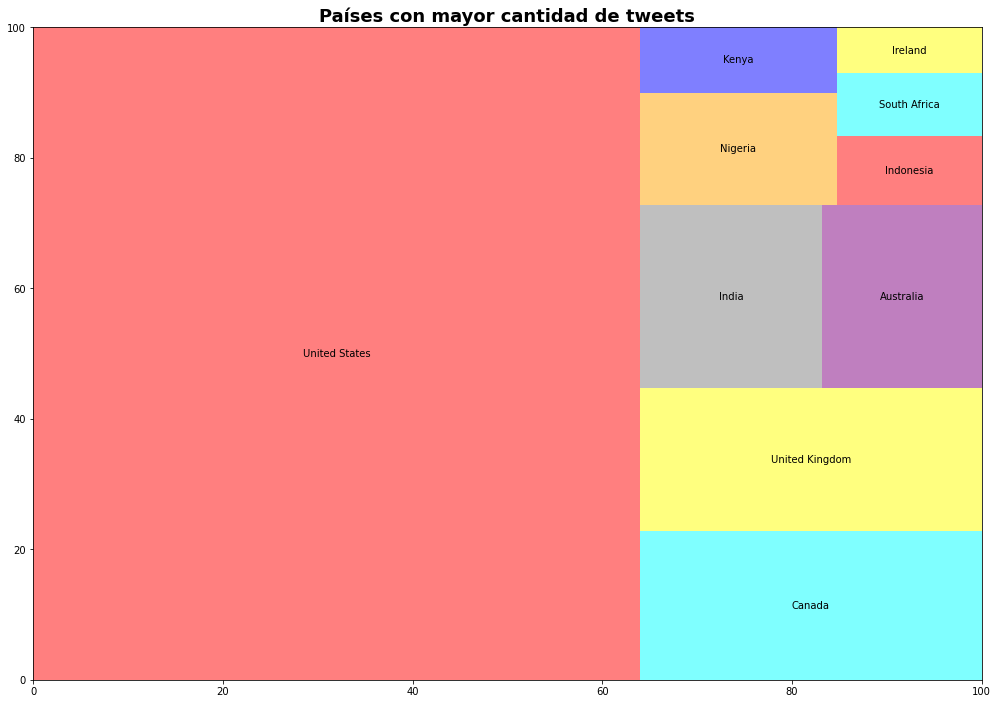

In [0]:
visu = squarify.plot(data, label=data.index, alpha=.5, color=['red','cyan','yellow','grey','purple','orange','blue'])
visu.set_title('Países con mayor cantidad de tweets', fontsize=18, fontweight='bold');

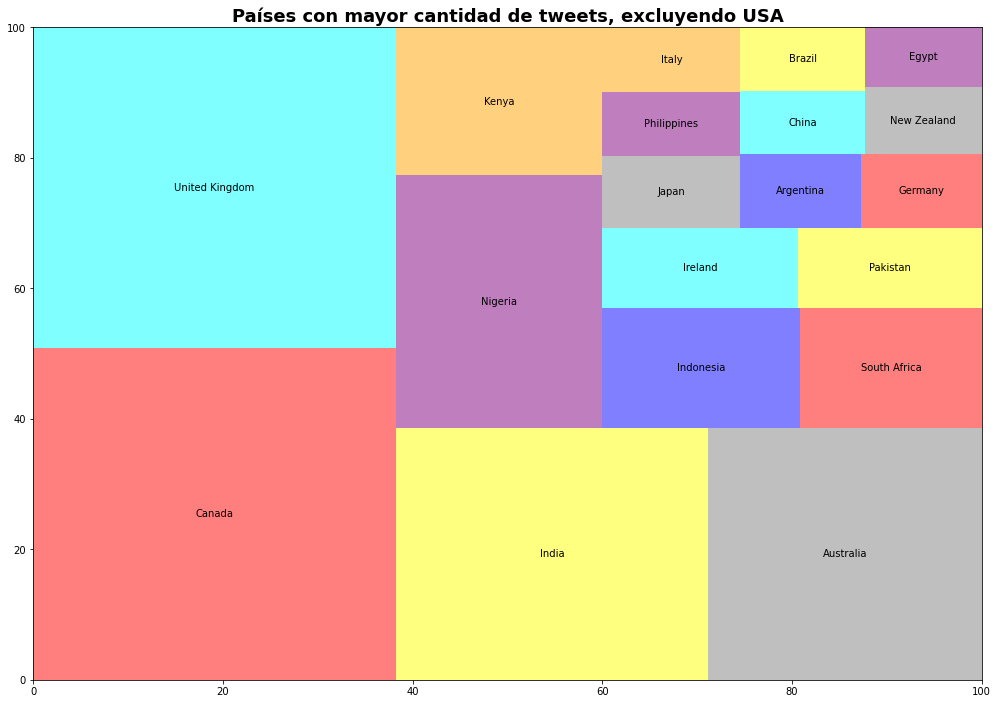

In [0]:
# sacamos USA para poder ver mejor los otros paises
dataWithoutUSA = df_location.country.value_counts().head(20)[1:,]
visu = squarify.plot(dataWithoutUSA, label=dataWithoutUSA.index, alpha=.5, color=['red','cyan','yellow','grey','purple','orange','blue'])
visu.set_title('Países con mayor cantidad de tweets, excluyendo USA', fontsize=18, fontweight='bold');

In [0]:
# filtramos por ciudades de USA
cities = df_location.loc[df_location.country == 'United States',].loc[df_location.location != 'United States',] 
data = cities.location.value_counts().head(10)


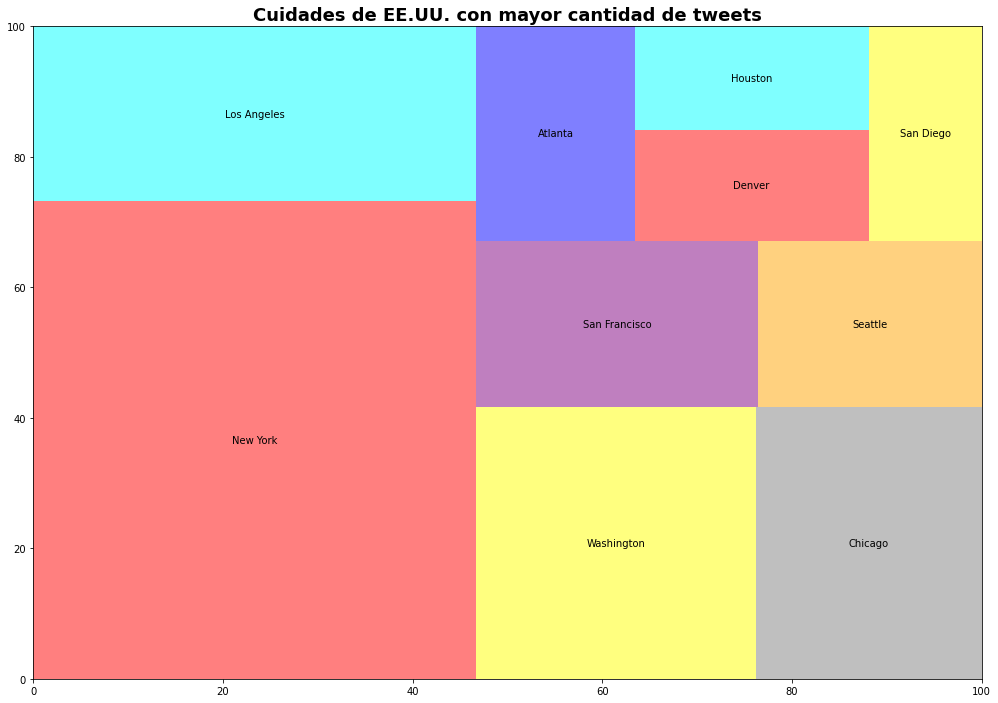

In [0]:
visu = squarify.plot(data, label=data.index, alpha=.5, color=['red','cyan','yellow','grey','purple','orange','blue']) 
visu.set_title('Cuidades de EE.UU. con mayor cantidad de tweets', fontsize=18, fontweight='bold');

In [0]:
cities = df_location.loc[df_location.country == 'United States',].loc[df_location.location != 'United States',] 
cities.head()

,id,keyword,location,text,target,text_clean,link,contact,hashtag,country,population,city
4,52,ablaze,Philadelphia,Crying out for more! Set me ablaze,0,"[cry, set, ablaze]",0,0,0,United States,5637884.0,Philadelphia
12,66,ablaze,Greensboro,How the West was burned: Thousands of wildfires ablaze in California alone http://t.co/vl5TBR3wbr,1,"[west, burned, thousand, wildfire, ablaze, california, alone]",1,0,0,United States,335588.0,Greensboro
18,77,ablaze,Anaheim,Police: Arsonist Deliberately Set Black Church In North CarolinaåÊAblaze http://t.co/pcXarbH9An,1,"[police, arsonist, deliberately, set, black, church, north, carolinaablaze]",1,0,0,United States,352497.0,Anaheim
32,95,ablaze,San Francisco,@ablaze what time does your talk go until? I don't know if I can make it due to work.,0,"[time, talk, go, dont, know, make, due, work]",0,1,0,United States,3603761.0,San Francisco
34,97,accident,Nashville,Accident on I-24 W #NashvilleTraffic. Traffic moving 8m slower than usual. https://t.co/0GHk693EgJ,1,"[accident, w, nashvilletraffic, traffic, moving, slower, usual]",1,0,1,United States,1076645.0,Nashville


In [0]:
# preparamos los datos para poder visualizar en un mapa
cityAndCountries1 = pd.read_csv(io.BytesIO(data_to_load['worldcities.csv']))
uss_cities=cityAndCountries1.loc[cityAndCountries1['iso2'] == 'US'][['lat','lng','city']]
uss_cities.drop(uss_cities[uss_cities.lng == -94.7443].index, inplace=True)

In [0]:
uss_location= pd.DataFrame({'city':cities.location.value_counts().index, 'location':cities.location.value_counts().values})
uss_location=uss_location.head(25)
uss_location

,city,location
0,New York,131
1,Los Angeles,48
2,Washington,47
3,Chicago,38
4,San Francisco,29
5,Seattle,23
6,Atlanta,21
7,Denver,16
8,Houston,15
9,San Diego,15


In [0]:
df3 = pd.merge(uss_location,uss_cities,how='outer',left_on=['city'],right_on=['city'])
df3=df3.drop_duplicates(subset=['city'], keep='first')

df3['lng'].replace(to_replace=['-73.9249'],value='-74')
df3=df3.head(25)
df3

,city,location,lat,lng
0,New York,131.0,40.6943,-73.9249
1,Los Angeles,48.0,34.1139,-118.4068
2,Washington,47.0,38.9047,-77.0163
11,Chicago,38.0,41.8373,-87.6861
12,San Francisco,29.0,37.7562,-122.4430
13,Seattle,23.0,47.6211,-122.3244
14,Atlanta,21.0,33.1136,-94.1672
16,Denver,16.0,39.7621,-104.8759
17,Houston,15.0,29.7868,-95.3905
18,San Diego,15.0,32.8312,-117.1226


In [0]:
df3['text'] = df3['city'] + '<br>' + df3['location'].astype(str)
fig = go.Figure(data=go.Scattergeo(
        locationmode = 'USA-states',
        lon = df3['lng'],
        lat = df3['lat'],
        text = df3['text'],
        mode = 'markers',
        marker = dict(
            size = 12,
            opacity = 0.9,
            reversescale = False,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=1,
                color='rgba(250, 250, 250)'
            ),
            colorscale = 'rainbow',
            cmin = -20,
            color = df3['location'],
            cmax = df3['location'].max(),
            colorbar_title=" cantidad de tweets<br>por ciudad de EE.UU."
        )))
fig.update_layout(
        title = 'Ciudades de EE.UU. con mayor cantidad de tweets',
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5

        ),
    )
fig.show()

In [0]:
# normalizamos por poblacion
cities= cities.groupby('location')['text','population'].agg({'text' : 'count', 'population' : lambda x: x.iloc[0]})
cities['norm'] = cities['text']/cities['population']
cities['text']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



location
Albuquerque           1
Amarillo              1
Anaheim               1
Anchorage             3
Antioch               2
Arlington             5
Asheville             5
Atlanta              21
Augusta               2
Austin               12
Bakersfield           3
Baltimore             5
Baton Rouge           3
Boise                 2
Boston               10
Bremerton             1
Bronx                 2
Brooklyn             10
Buffalo               3
Chandler              1
Charleston            3
Charlotte            11
Chicago              38
Cincinnati            1
Cleveland            10
College Station       1
Colorado Springs      1
Columbia              2
Corpus Christi        2
Dallas               12
Dayton                2
Denton                1
Denver               16
Des Moines            4
Detroit               6
Durham                2
El Paso               2
Eugene                1
Evansville            1
Fort Collins          1
Fort Wayne            1
Fort Wo

In [0]:
cities = cities[['norm']]
cities.head()


,norm
location,
Albuquerque,0.000001
Amarillo,0.000005
Anaheim,0.000003
Anchorage,0.000012
Antioch,0.000007


In [0]:
cities1 = df_location.loc[df_location.country == 'United States',].loc[df_location.location != 'United States',] 
cities1= cities1.groupby('location')['text','population'].agg({'text' : 'count', 'population' : lambda x: x.iloc[0]})
cities1['norm'] = cities1['text']/cities1['population']
cities1=cities1[['norm']]
cities1.reset_index(level=0, inplace=True)
df2 = cities1.rename({'location': 'city'}, axis='columns')
df2.head(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,city,norm
0,Albuquerque,0.000001
1,Amarillo,0.000005
2,Anaheim,0.000003


In [0]:
df44 = pd.merge(df2,uss_cities,how='outer',left_on=['city'],right_on=['city'])
df44=df44.sort_values('norm',ascending=False)
df44=df44.drop_duplicates(subset=['city'], keep='first')
df44=df44.head(27)

In [0]:
df44['text'] = df44['city'] + '<br>' + df44['norm'].astype(str)
fig = go.Figure(data=go.Scattergeo(
        locationmode = 'USA-states',
        lon = df44['lng'],
        lat = df44['lat'],
        text = df44['text'],
        mode = 'markers',
        marker = dict(
            size = 12,
            opacity = 0.9,
            reversescale = False,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=1,
                color='rgba(250, 250, 250)'
            ),
            colorscale = 'earth',
            cmin = 0,
            color = df44['norm'],
            cmax = df44['norm'].max(),
            colorbar_title="cantitad de tweets<br>dividido por la poblacion"
        )))
fig.update_layout(
        title = 'Ciudades de EE.UU. con mayor cantidad de tweets, normalizado por la población',
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5

        ),
    )
fig.show()

# Pregunta 2

In [0]:
# Buscamos cuales paises generan mayor cantidad de tweets verdaderos o falsos
data = df_location.country.value_counts().rename_axis('country').reset_index(name='tweetCount')
data.head()

,country,tweetCount
0,United States,953
1,Canada,122
2,United Kingdom,118
3,India,80
4,Australia,70


In [0]:
dfTargetTrue = df_location.loc[df_location.target == 1,:].country.value_counts().rename_axis('country').reset_index(name='tweetCountTrue')
dfTargetFalse = df_location.loc[df_location.target == 0,:].country.value_counts().rename_axis('country').reset_index(name='tweetCountFalse')

In [0]:
tweetTrue = dfTargetTrue.merge(data)
tweetTrue['percent'] = tweetTrue['tweetCountTrue']/tweetTrue['tweetCount']
tweetTrue = tweetTrue.loc[tweetTrue.tweetCount>20,:].sort_values(by=['percent'], ascending=False).head(5) #filtramos para quedarnos con los que tienen mas de 20 tweets

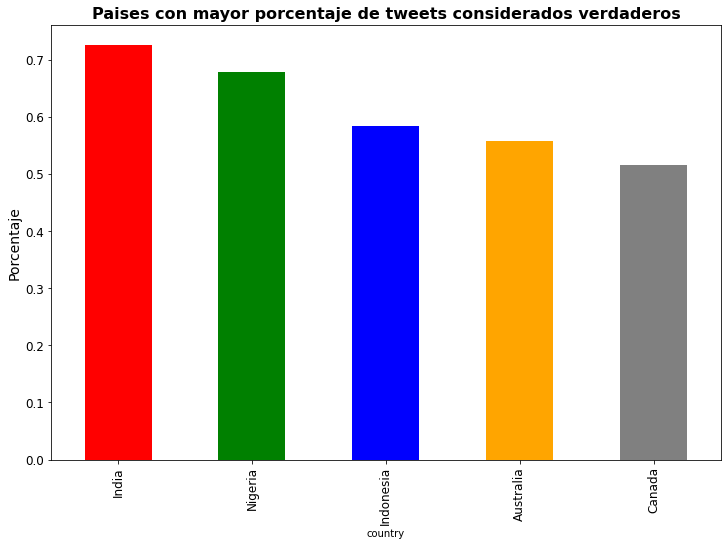

In [0]:
tweetTrue.plot(kind='bar',x='country', y='percent',legend=False, color=('r', 'g','b','orange','grey','purple'), figsize=(12,8), fontsize=12)
plt.ylabel('Porcentaje',fontsize=14)
plt.title('Paises con mayor porcentaje de tweets considerados verdaderos',fontsize=16,fontweight='bold');

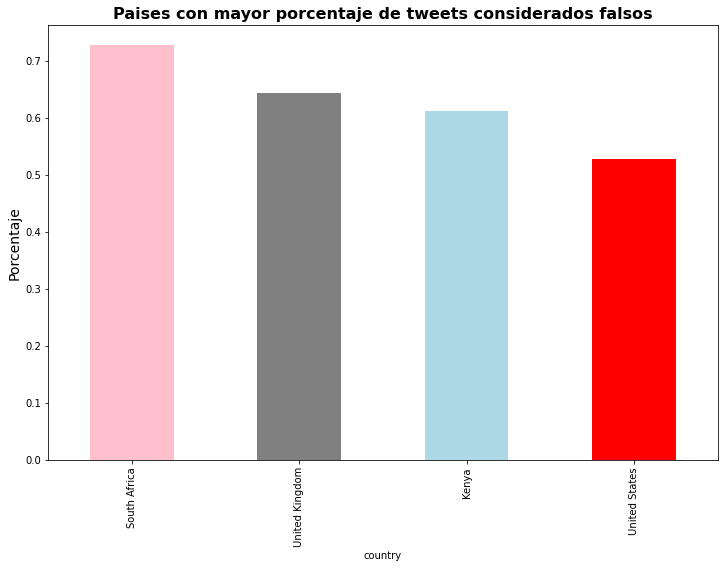

In [0]:
tweetFalse = dfTargetFalse.merge(data)
tweetFalse['percent'] = tweetFalse['tweetCountFalse']/tweetFalse['tweetCount']
tweetFalse = tweetFalse.loc[tweetFalse.tweetCount>20,:].sort_values(by=['percent'], ascending=False).head(4) # tambien filtramos por mas de 20 tweets
tweetFalse.plot(kind='bar',x='country', y='percent',color=('pink', 'grey', 'lightblue','r', 'purple', 'b'),\
                figsize=(12,8), legend=False)
plt.title('Paises con mayor porcentaje de tweets considerados falsos',fontsize=16,fontweight='bold')
plt.ylabel('Porcentaje',fontsize=14);

# Pregunta 3

In [0]:
# calculamos la longitud de los tweets y los reagrupamos por pais para obtener el promedio
df_location['tweetLength'] = df_location['text'].str.len()
meanLengthPerCountry = df_location[['country','tweetLength','text']].groupby('country').agg({'tweetLength':np.mean, 'text':'count'}).sort_values(by=['tweetLength'], ascending=False)
meanLengthPerCountry = meanLengthPerCountry.reset_index()
meanLengthPerCountry = meanLengthPerCountry[meanLengthPerCountry.text > 2] # buscamos los paises que tengal al menos 3 tweets
meanLengthPerCountry.head(10)

,country,tweetLength,text
12,Finland,129.500000,4
15,Afghanistan,126.666667,3
18,Kenya,124.322581,31
20,France,124.000000,5
22,Switzerland,122.285714,7
23,China,121.375000,8
24,New Zealand,117.375000,8
25,Japan,117.100000,10
26,Nigeria,116.830189,53
27,India,115.462500,80


In [0]:
# calculamos el promedio mundial de la longitud del tweet
np.mean(df_location.tweetLength)

102.17548687552922

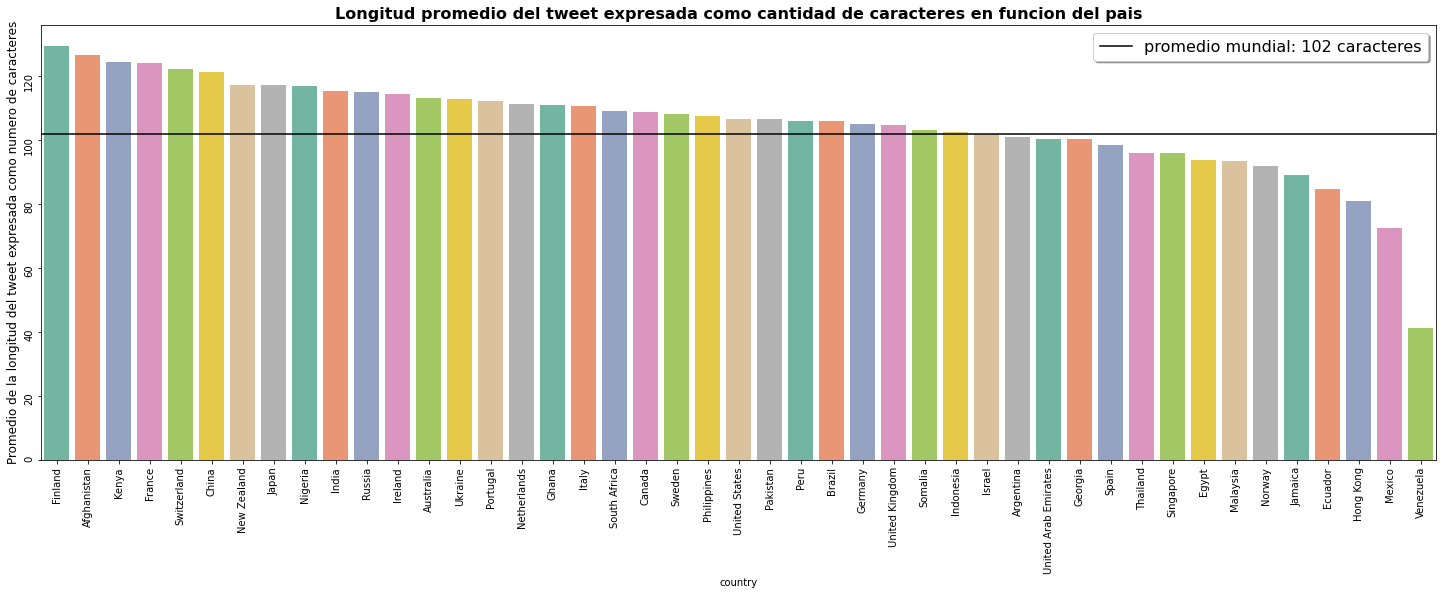

In [0]:

plt.figure(figsize = (25,8))
sns.barplot(x='country',y='tweetLength', data=meanLengthPerCountry, palette='Set2')
plt.axhline(102, color='black', label= 'promedio mundial: 102 caracteres')
plt.ylabel('Promedio de la longitud del tweet expresada como numero de caracteres', fontsize=12)
plt.legend(fontsize = 16, shadow=True)
plt.tick_params(labelrotation=90)
plt.title('Longitud promedio del tweet expresada como cantidad de caracteres en funcion del pais',fontsize=16,fontweight='bold');

#![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
<a id='section3'></a>

<div style="border-bottom:3px solid #000;"> 
<div align="left"><h2>Step 5: Análisis del texto segun el target</h2></div>
<div align="right">(return to <a href='#top1'><b>Top</b></a>)</div>
</div>

# Pregunta 1


In [0]:
# analizamos la columna keyword
dfWithKeyword = df.loc[~df['keyword'].isnull()]

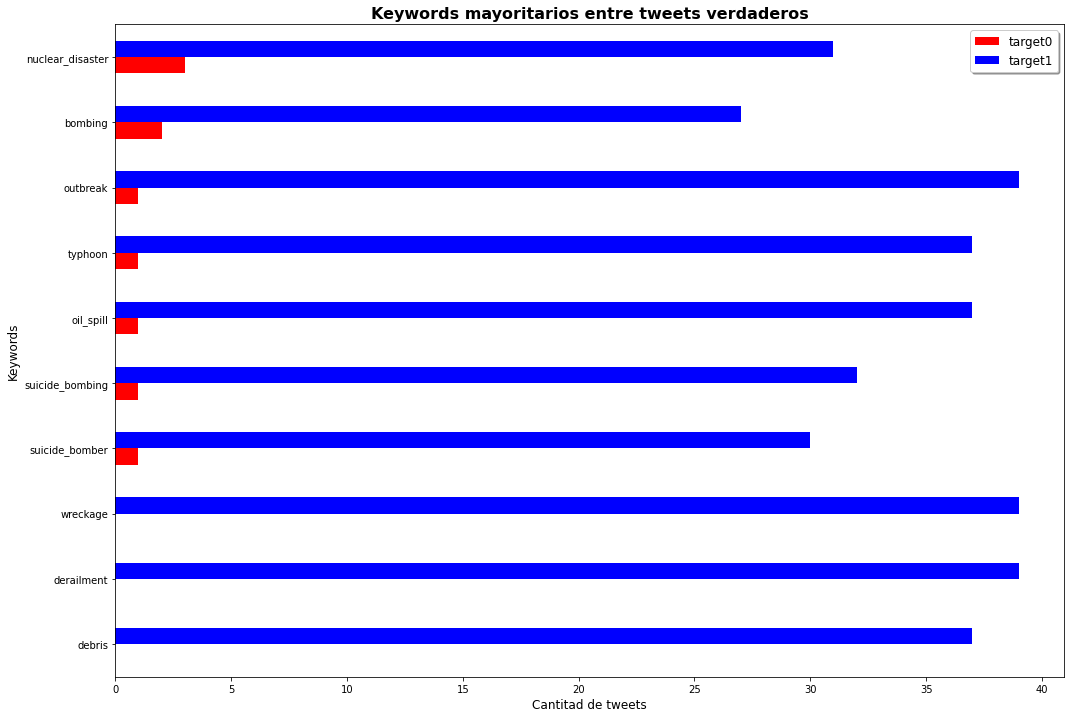

In [0]:
keywords = dfWithKeyword.groupby('keyword').agg(target0=pd.NamedAgg(column='target', aggfunc=lambda x: (x == 0).sum()), target1=pd.NamedAgg(column='target', aggfunc=lambda x: (x == 1).sum())).sort_values(by=['target0', 'target1'])
keywords.head(10).plot.barh(rot=0,color=['r', 'b'])
plt.ylabel('Keywords', fontsize=12)
plt.xlabel('Cantitad de tweets', fontsize=12)
plt.legend(fontsize=12, shadow=True)
plt.title('Keywords mayoritarios entre tweets verdaderos',fontsize=16,fontweight='bold');

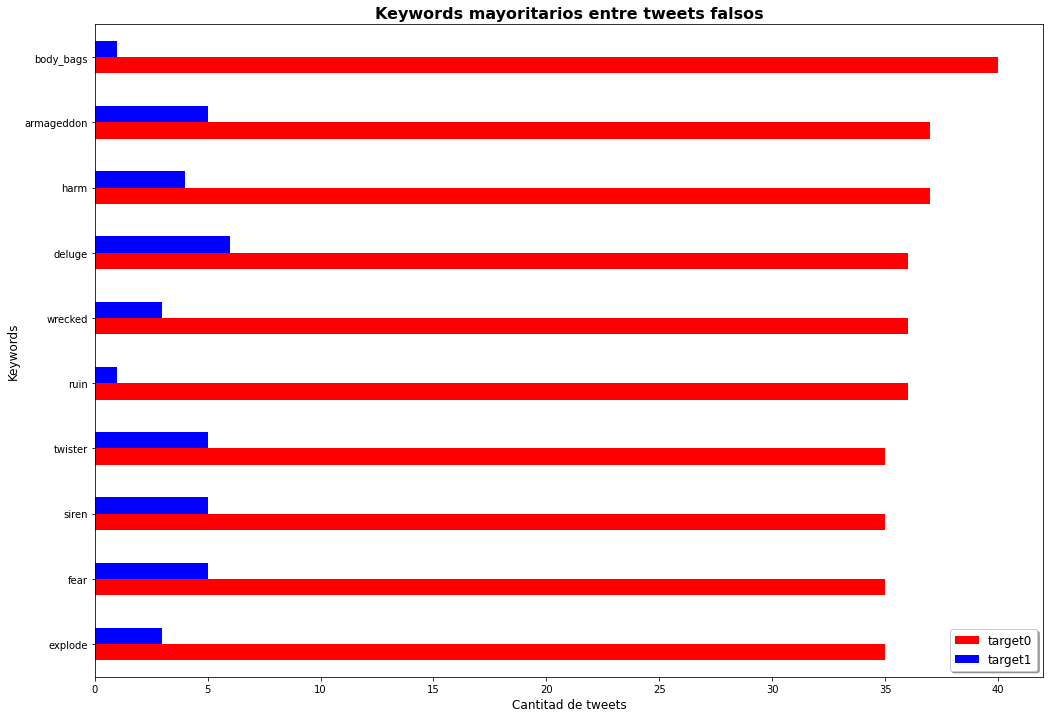

In [0]:
# al no encontrar exclusivas en target 0, buscamos las menos frecuentes en target 1
keywords.tail(10).plot.barh(rot=0,color=['r', 'b'])
plt.ylabel('Keywords', fontsize=12)
plt.xlabel('Cantitad de tweets', fontsize=12)
plt.legend(fontsize=12, shadow=True)
plt.title('Keywords mayoritarios entre tweets falsos',fontsize=16,fontweight='bold');

# Pregunta 2

In [0]:
dff = df                                             
dff['textleng'] = dff['text'].apply(len)

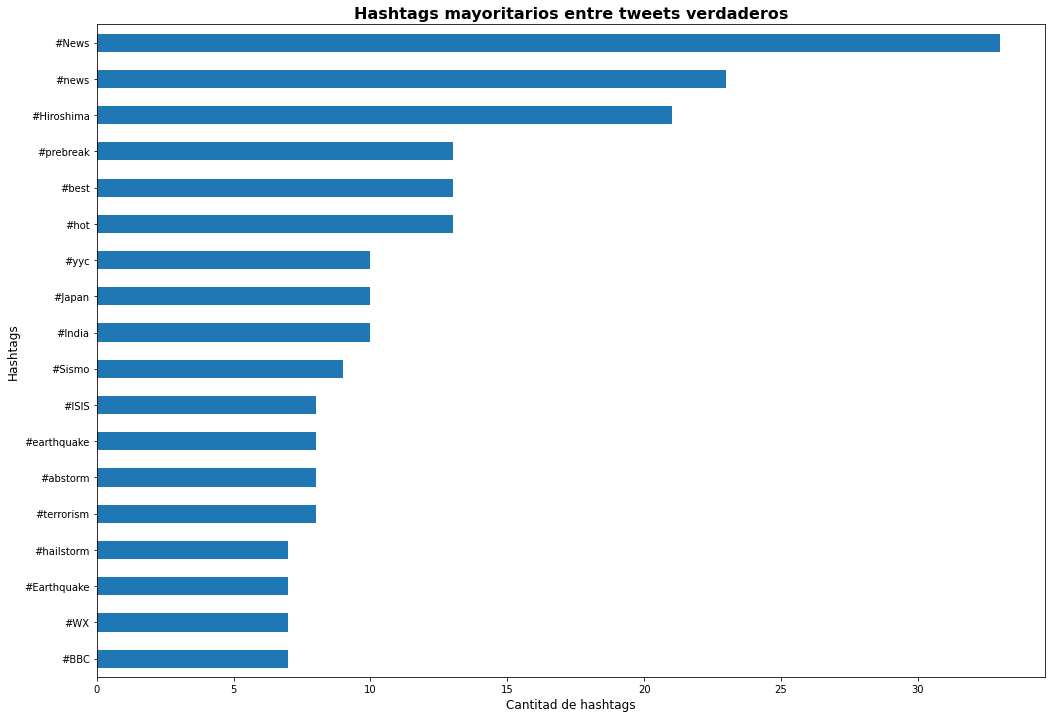

In [0]:
# extraemos los hashtags y ploteamos los mas frecuentes en tweets reales
Most_common_hashatgs1=pd.Series(dff[dff['target']==1]['text'].str.extractall(r'(\#\w+)')[0].value_counts()).where(lambda x : x>6).dropna()
Most_common_hashatgs1.sort_values().plot(kind='barh')
plt.ylabel('Hashtags', fontsize=12)
plt.xlabel('Cantitad de hashtags', fontsize=12)
plt.title('Hashtags mayoritarios entre tweets verdaderos',fontsize=16,fontweight='bold');

In [0]:
# trabajamos los hashtag para separarlos por target y poder generar una nube de palabras
hsh1=pd.Series(dff[dff['target']==1]['text'].str.findall(r'(\#\w+)'))
flat_list1 = [item for sublist in hsh1.tolist() for item in sublist]
series1 = pd.Series( (v for v in flat_list1) ).str.cat(sep=' ')
hsh0=pd.Series(dff[dff['target']==0]['text'].str.findall(r'(\#\w+)'))
flat_list0= [item for sublist in hsh0.tolist() for item in sublist]
series0 = pd.Series( (v for v in flat_list0) ).str.cat(sep=' ')

In [0]:
def generate_wordcloud(words, mask):
    word_cloud = WordCloud(width = 512, height = 512, background_color='white', stopwords=STOPWORDS, mask=mask).generate(words)
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()


mask = np.array(Image.open(requests.get('https://img.favpng.com/25/3/22/hashtag-computer-icons-number-sign-png-favpng-bpUAvJkxHKT3x1gfji1a7QnV3.jpg', stream=True).raw))

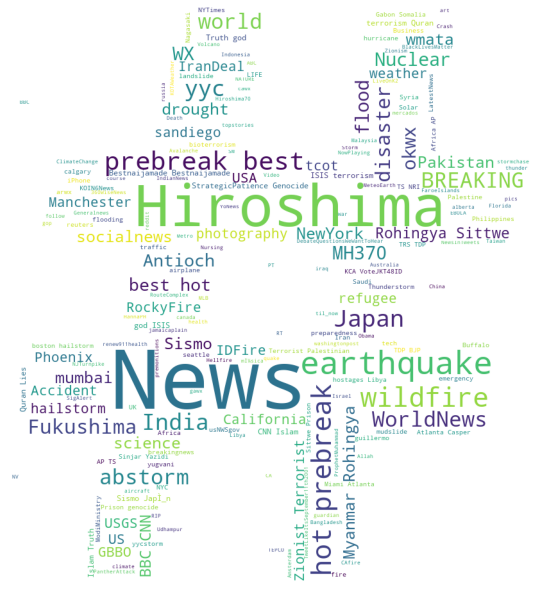

In [0]:
generate_wordcloud(series1, mask)

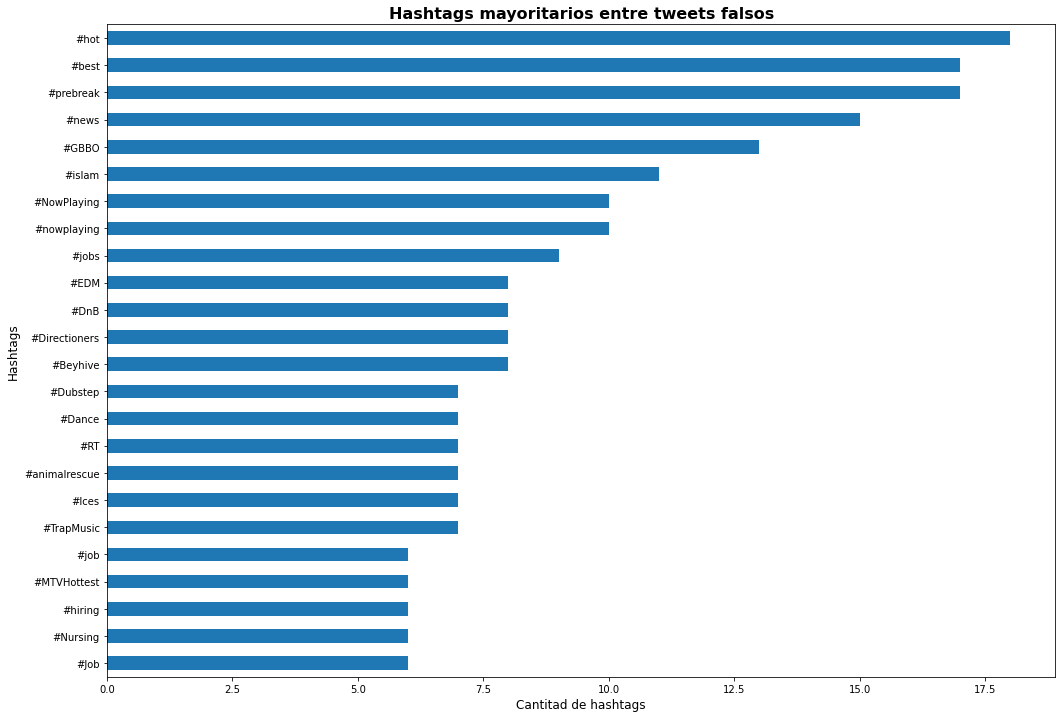

In [0]:
# extraemos los hashtags y ploteamos los mas frecuentes en tweets falsos
Most_common_hashatgs0=pd.Series(dff[dff['target']==0]['text'].str.extractall(r'(\#\w+)')[0].value_counts()).where(lambda x : x>5).dropna()
Most_common_hashatgs0.sort_values().plot(kind='barh')
plt.ylabel('Hashtags', fontsize=12)
plt.xlabel('Cantitad de hashtags', fontsize=12)
plt.title('Hashtags mayoritarios entre tweets falsos',fontsize=16,fontweight='bold');

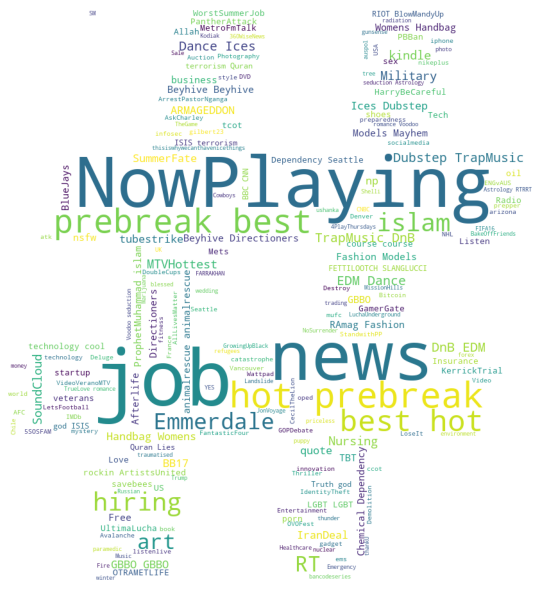

In [0]:
generate_wordcloud(series0, mask)

In [0]:
hashtags1=dff[dff['target']==1]['text'].str.findall(r'#.*?(?=\s|$)')
hashtags0=dff[dff['target']==0]['text'].str.findall(r'#.*?(?=\s|$)')
i1 = hashtags1[(hashtags1.str.len() == 0)].index
i0 = hashtags0[(hashtags0.str.len() == 0)].index
hashtags1=hashtags1.drop(i1)
hashtags0=hashtags0.drop(i0)
number_of_hashtags_per_row1=hashtags1.str.len()
number_of_hashtags_per_row0=hashtags0.str.len()
print ('Promedio de hashtags en un tweet falso es ',number_of_hashtags_per_row1.mean())
print ('Promedio de hashtags en un tweet verdadero es ',number_of_hashtags_per_row0.mean())

Promedio de hashtags en un tweet falso es  1.936
Promedio de hashtags en un tweet verdadero es  1.90744920993228


#Pregunta 3





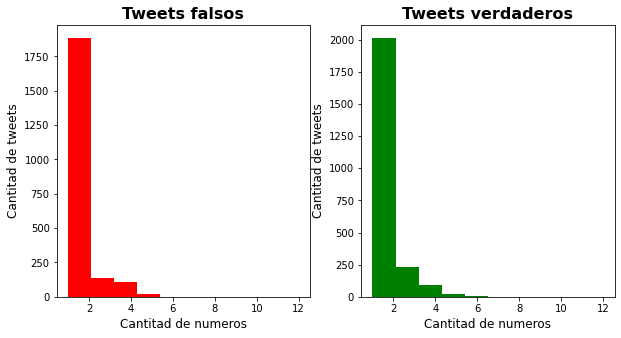

In [0]:
# analizamos el contenido de caracteres numericos

df_numeros1=dff[dff['target']==1]['text'].str.replace(',', '').str.extract('(\d+)')
df_numeros0=dff[dff['target']==0]['text'].str.replace(',', '').str.extract('(\d+)')
df_numeros0.columns = ['los numeros en no dis_tweets']
df_numeros1.columns = ['los numeros en dis_tweets']
df_numeros0.dropna(subset = ["los numeros en no dis_tweets"], inplace=True)
df_numeros1.dropna(subset = ["los numeros en dis_tweets"], inplace=True)
tweet_lzen0 = df_numeros0['los numeros en no dis_tweets'].str.len()
tweet_lzen1 = df_numeros1['los numeros en dis_tweets'].str.len()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(tweet_lzen0, color='red')
ax2.hist(tweet_lzen1, color='green')

ax1.set_ylabel('Cantitad de tweets', fontsize=12)
ax1.set_xlabel('Cantitad de numeros', fontsize=12)
ax1.set_title('Tweets falsos',fontsize=16,fontweight='bold');

ax2.set_ylabel('Cantitad de tweets', fontsize=12)
ax2.set_xlabel('Cantitad de numeros', fontsize=12)
ax2.set_title('Tweets verdaderos',fontsize=16,fontweight='bold');

In [0]:
# definimos diferentes grupos de tweets segun su cantidad de numeros
df_tweet_lzen0=pd.DataFrame(tweet_lzen0)
df_tweet_lzen1=pd.DataFrame(tweet_lzen1)

In [0]:
# primero con los tweets falsos
df_tweet_lzen0[(df_tweet_lzen0['los numeros en no dis_tweets']<2)].count()
nodis_1=len(df_tweet_lzen0[(df_tweet_lzen0['los numeros en no dis_tweets']<2)])

In [0]:
df_tweet_lzen0[(df_tweet_lzen0['los numeros en no dis_tweets']<3) & (df_tweet_lzen0['los numeros en no dis_tweets']>1)].count()
nodis_2=len(df_tweet_lzen0[(df_tweet_lzen0['los numeros en no dis_tweets']<3) & (df_tweet_lzen0['los numeros en no dis_tweets']>1)])

In [0]:
df_tweet_lzen0[(df_tweet_lzen0['los numeros en no dis_tweets']<4) & (df_tweet_lzen0['los numeros en no dis_tweets']>2)].count()
nodis_3=len(df_tweet_lzen0[(df_tweet_lzen0['los numeros en no dis_tweets']<4) & (df_tweet_lzen0['los numeros en no dis_tweets']>2)])

In [0]:
df_tweet_lzen0[(df_tweet_lzen0['los numeros en no dis_tweets']<5) & (df_tweet_lzen0['los numeros en no dis_tweets']>3)].count()
nodis_4=len(df_tweet_lzen0[(df_tweet_lzen0['los numeros en no dis_tweets']<5) & (df_tweet_lzen0['los numeros en no dis_tweets']>3)])

In [0]:
df_tweet_lzen0[(df_tweet_lzen0['los numeros en no dis_tweets']>4)].count()
nodis_sup_4=len(df_tweet_lzen0[(df_tweet_lzen0['los numeros en no dis_tweets']>4)])
nodis_sup_4

24

In [0]:
# ahora con los verdaderos
df_tweet_lzen1[(df_tweet_lzen1['los numeros en dis_tweets']<2)].count()
dis_1=len(df_tweet_lzen1[(df_tweet_lzen1['los numeros en dis_tweets']<2)])

In [0]:
df_tweet_lzen1[(df_tweet_lzen1['los numeros en dis_tweets']<3) & (df_tweet_lzen1['los numeros en dis_tweets']>1)].count()
dis_2=len(df_tweet_lzen1[(df_tweet_lzen1['los numeros en dis_tweets']<3) & (df_tweet_lzen1['los numeros en dis_tweets']>1)])

In [0]:
df_tweet_lzen1[(df_tweet_lzen1['los numeros en dis_tweets']<4) & (df_tweet_lzen1['los numeros en dis_tweets']>2)].count()
dis_3=len(df_tweet_lzen1[(df_tweet_lzen1['los numeros en dis_tweets']<4) & (df_tweet_lzen1['los numeros en dis_tweets']>2)])

In [0]:
df_tweet_lzen1[(df_tweet_lzen1['los numeros en dis_tweets']<5) & (df_tweet_lzen1['los numeros en dis_tweets']>3)].count()
dis_4=len(df_tweet_lzen1[(df_tweet_lzen1['los numeros en dis_tweets']<5) & (df_tweet_lzen1['los numeros en dis_tweets']>3)])

In [0]:
df_tweet_lzen1[(df_tweet_lzen1['los numeros en dis_tweets']>4)].count()
dis_sup_4=len(df_tweet_lzen1[(df_tweet_lzen1['los numeros en dis_tweets']>4)])

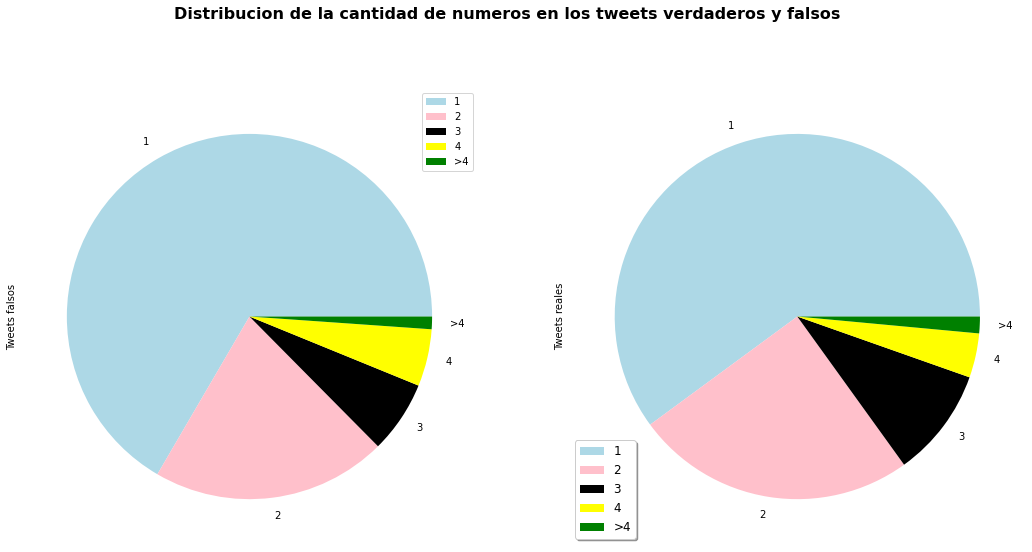

In [0]:
df_pie1 = pd.DataFrame({'Tweets falsos':[nodis_1,nodis_2,nodis_3,nodis_4,nodis_sup_4], 'Tweets reales':[dis_1,dis_2,dis_3,dis_4,dis_sup_4]}, index=['1', '2', '3','4','>4'] )
 
# hacemos el multiple plot
df_pie1.plot(kind='pie', subplots=True, figsize=(18,9), colors=['lightblue', 'pink', 'black','yellow','green'])
plt.suptitle('Distribucion de la cantidad de numeros en los tweets verdaderos y falsos', fontsize=16, fontweight='bold')
plt.legend(fontsize=12, shadow=True);

In [0]:
df_numeros1=dff[dff['target']==1]['text'].str.replace(',', '').str.extract('(\d+)')
df.iloc[7338]

id                                                                                       10505
keyword                                                                               wildfire
location                                                                           Oakland, CA
text          California is battling its scariest 2015 wildfire so far. http://t.co/Lec1vmS7x2
target                                                                                       1
text_clean                                     [california, battling, scariest, wildfire, far]
link                                                                                         1
contact                                                                                      0
hashtag                                                                                      0
textleng                                                                                    80
Name: 7338, dtype: object

In [0]:
len(df_tweet_lzen1[(df_tweet_lzen1['los numeros en dis_tweets']>4)])

35

In [0]:
df_numeros1=dff[dff['target']==1]['text'].str.replace(',', '').str.extract('(\d+)')
df_numeros0=dff[dff['target']==0]['text'].str.replace(',', '').str.extract('(\d+)')
df_numeros0.columns = ['longitud de los numeros en no dis_tweets']
df_numeros1.columns = ['longitud de los numeros en dis_tweets']
df_numeros0.dropna(subset = ["longitud de los numeros en no dis_tweets"], inplace=True)
df_numeros1.dropna(subset = ["longitud de los numeros en dis_tweets"], inplace=True)
dis=df_numeros1["longitud de los numeros en dis_tweets"].count()
no_dis=df_numeros0["longitud de los numeros en no dis_tweets"].count()

In [0]:
df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [0]:
total_verd = 3271
total_fals = 4342

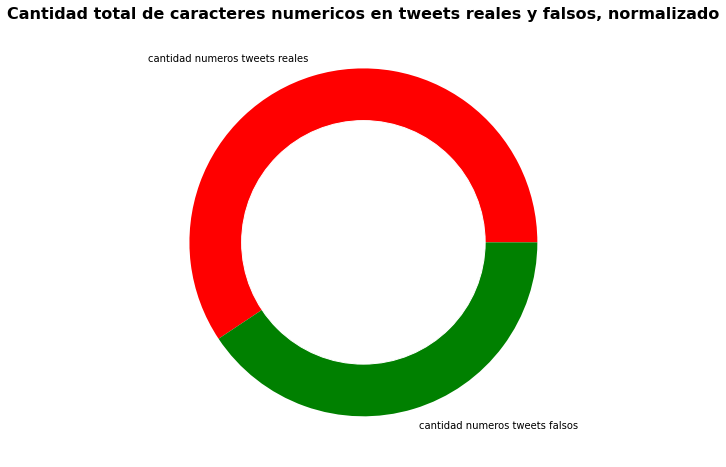

In [0]:
names='cantidad numeros tweets reales', 'cantidad numeros tweets falsos',
size=[dis/total_verd,no_dis/total_fals]
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['red','green'])
p=plt.gcf()
p.set_size_inches(11,8)
p.gca().add_artist(my_circle)
plt.title('Cantidad total de caracteres numericos en tweets reales y falsos, normalizado', fontsize=16, fontweight='bold');

In [0]:
df_tweet_lzen1[(df_tweet_lzen1['los numeros en dis_tweets']<3)].count()
dis_1_2=len(df_tweet_lzen1[(df_tweet_lzen1['los numeros en dis_tweets']<3)])
dis_1_2

2013

In [0]:
df_tweet_lzen0[(df_tweet_lzen0['los numeros en no dis_tweets']>9) & (df_tweet_lzen0['los numeros en no dis_tweets']<11)].count()


los numeros en no dis_tweets    0
dtype: int64

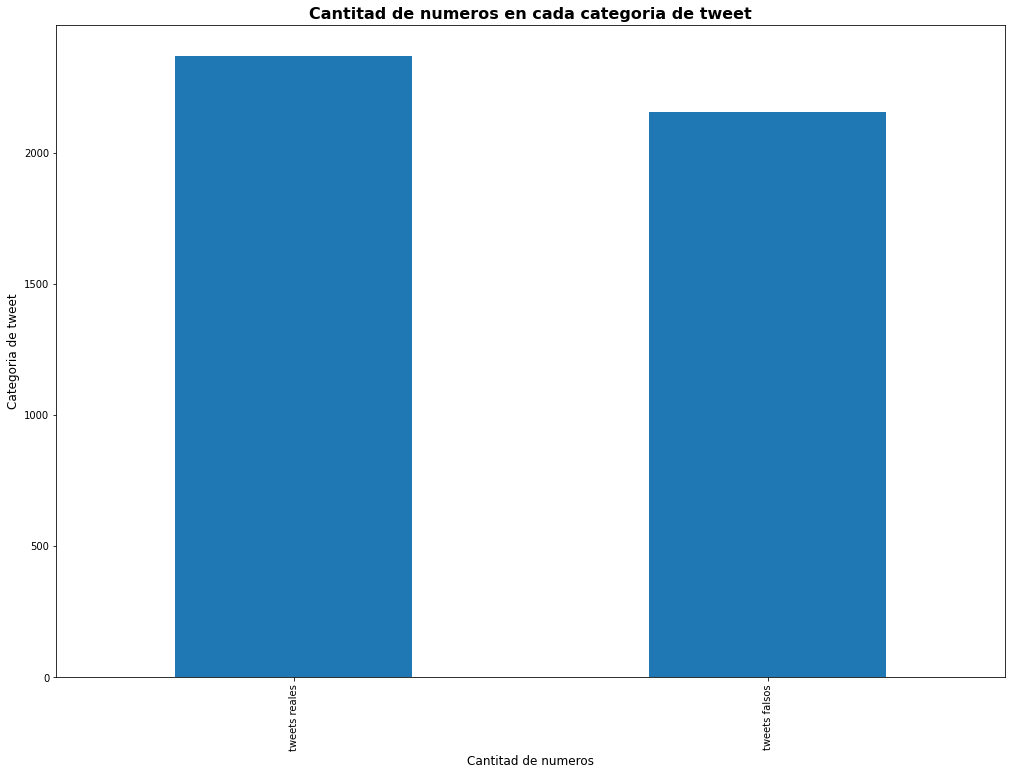

In [0]:
s = pd.Series({'tweets reales': dis , 'tweets falsos': no_dis})
s.plot.bar()
plt.ylabel('Categoria de tweet', fontsize=12)
plt.xlabel('Cantitad de numeros', fontsize=12)
plt.title('Cantitad de numeros en cada categoria de tweet',fontsize=16,fontweight='bold');



# Pregunta 4

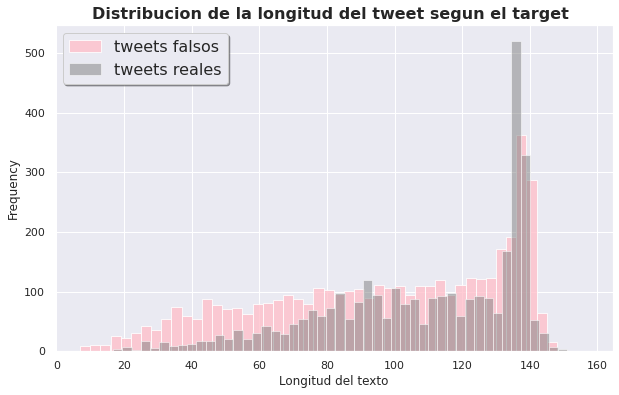

In [0]:
# comparamos la distribucion de la longitud del tweet falso y el tweet verdadero con un histograma
g0 = df_tweetclean.textleng[df_tweetclean['target']== 0].plot.hist(bins=50, color='pink', label='tweets falsos', alpha= 0.8)
g1 = df_tweetclean.textleng[df_tweetclean['target']== 1].plot.hist(bins=50, color= 'grey', label='tweets reales', alpha= 0.5)
plt.legend(loc='upper left', fontsize = 16, shadow=True)
plt.xlabel('Longitud del texto', fontsize=12)
plt.title('Distribucion de la longitud del tweet segun el target ', fontsize=16,fontweight='bold');

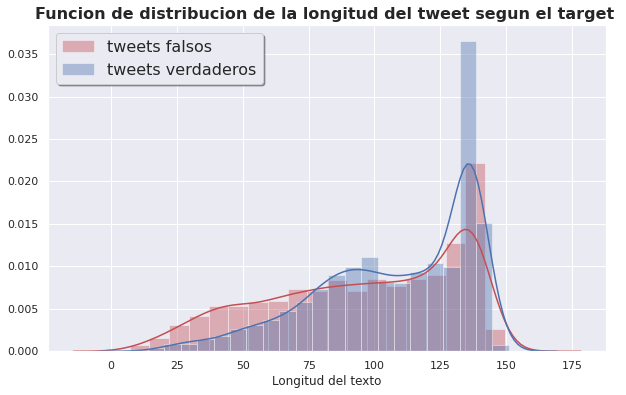

In [0]:
# ahora lo comparamos con una funcion de distribucion
g1 = sns.distplot(df_tweetclean.textleng[df_tweetclean['target']== 0], hist=True, color='r', label='tweets falsos')
g1 = sns.distplot(df_tweetclean.textleng[df_tweetclean['target']== 1], hist=True, color='b', label='tweets verdaderos')
plt.legend(loc='upper left', fontsize = 16, shadow=True)
plt.xlabel('Longitud del texto', fontsize=12)
plt.title('Funcion de distribucion de la longitud del tweet segun el target ', fontsize=16, fontweight='bold');

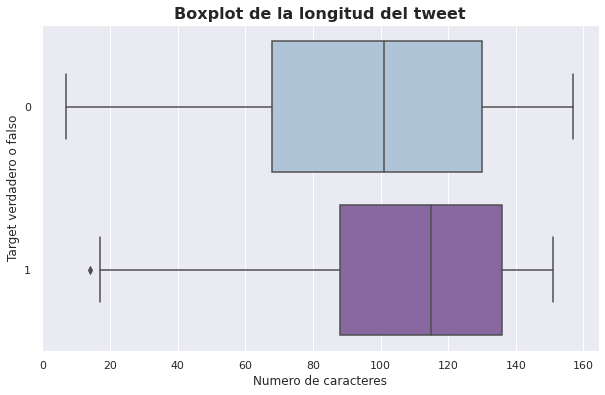

In [0]:
# analizamos valores estadisticos con un boxplot
g = sns.boxplot(y="target", x="textleng", data=df_tweetclean, palette="BuPu", orient='h' )
g.set_title("Boxplot de la longitud del tweet", fontsize=16, fontweight='bold')
g.set_ylabel("Target verdadero o falso", fontsize=12)
g.set_xlabel("Numero de caracteres", fontsize=12);

In [0]:
# creamos target_0 y target_1 para evaluar los estadisticos que muestra el boxplot
df_stats = df_tweetclean
df_stats['target_0'] = df_stats['textleng'][df_stats['target'] == 0]
df_stats['target_1'] = df_stats['textleng'][df_stats['target'] == 1]
df_stats[['textleng', 'target_0', 'target_1']].describe()           

,textleng,target_0,target_1
count,7613.000000,4342.000000,3271.000000
mean,101.037436,95.706817,108.113421
std,33.781325,35.885924,29.309854
min,7.000000,7.000000,14.000000
25%,78.000000,68.000000,88.000000
50%,107.000000,101.000000,115.000000
75%,133.000000,130.000000,136.000000
max,157.000000,157.000000,151.000000


Analizamos el contenido del texto segun la cantidad de palabras

In [0]:
def count_words(text):
    '''
    Funcion que toma un texto y devuelve la cantidad de palabras
    '''
    word_counts = len(text.split(' '))
    return word_counts

In [0]:
df_tweetclean['words'] = df_tweetclean['text'].apply(count_words)
df_tweetclean.head(3)

,id,keyword,location,text,target,text_clean,link,contact,hashtag,textleng,target_0,target_1,words
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,"[deed, reason, earthquake, may, allah, forgive, u]",0,0,1,69,NaN,69.0,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"[forest, fire, near, la, ronge, sask, canada]",0,0,0,38,NaN,38.0,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,"[resident, asked, shelter, place, notified, officer, evacuation, shelter, place, order, expected]",0,0,0,133,NaN,133.0,22


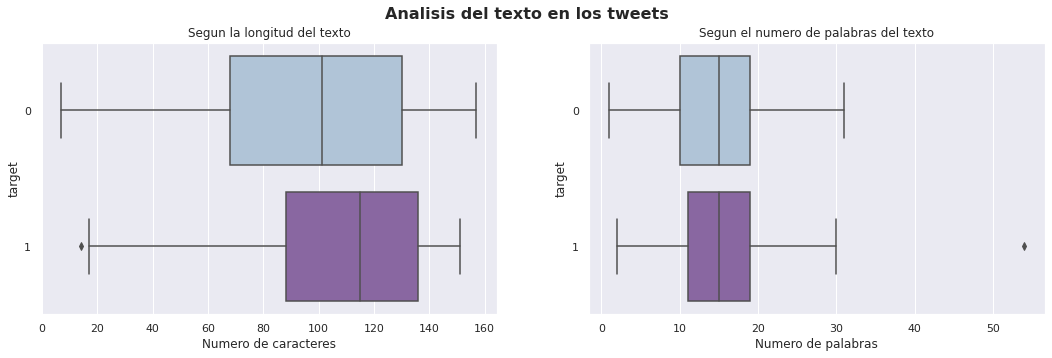

In [0]:
# comparamos los boxplots segun longitud del tweet y cantidad de palabras

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,5))
sns.boxplot(y="target", x="textleng", data=df_tweetclean,ax=ax1, palette="BuPu", orient='h' )
sns.boxplot(y="target", x="words", data=df_tweetclean,ax=ax2, palette="BuPu", orient='h' )
ax1.set_title('Segun la longitud del texto', fontsize=12)
ax2.set_title('Segun el numero de palabras del texto', fontsize=12)
ax1.set_xlabel('Numero de caracteres')
ax2.set_xlabel('Numero de palabras')
plt.suptitle("Analisis del texto en los tweets", fontsize=16, fontweight='bold');

#Pregunta 5

In [0]:
df_tweetclean.head()

,id,keyword,location,text,target,text_clean,link,contact,hashtag,textleng,target_0,target_1,words
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,"[deed, reason, earthquake, may, allah, forgive, u]",0,0,1,69,NaN,69.0,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"[forest, fire, near, la, ronge, sask, canada]",0,0,0,38,NaN,38.0,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,"[resident, asked, shelter, place, notified, officer, evacuation, shelter, place, order, expected]",0,0,0,133,NaN,133.0,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1,"[people, receive, wildfire, evacuation, order, california]",0,0,1,65,NaN,65.0,9
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,"[got, sent, photo, ruby, alaska, smoke, wildfire, pours, school]",0,0,1,88,NaN,88.0,17


In [0]:
# buscamos enlaces externos con http
df_tweetclean.groupby('link').agg(target0=pd.NamedAgg(column='target', aggfunc=lambda x: (x == 0).sum()), target1=pd.NamedAgg(column='target', aggfunc=lambda x: (x == 1).sum()))

,target0,target1
link,,
0,2543,1099
1,1799,2172


In [0]:
# buscamos contactos con @
df_tweetclean.groupby('contact').agg(target0=pd.NamedAgg(column='target', aggfunc=lambda x: (x == 0).sum()), target1=pd.NamedAgg(column='target', aggfunc=lambda x: (x == 1).sum()))

,target0,target1
contact,,
0,2979,2595
1,1363,676


In [0]:
# buscamos hashtags con #
df_tweetclean.groupby('hashtag').agg(target0=pd.NamedAgg(column='target', aggfunc=lambda x: (x == 0).sum()), target1=pd.NamedAgg(column='target', aggfunc=lambda x: (x == 1).sum()))

,target0,target1
hashtag,,
0,3456,2396
1,886,875


In [0]:
data = [(1799, 1363, 886), (2172, 676, 875)]
df = pd.DataFrame(data, columns = ['link','contact','hashtag'])
df = df.T
df.columns = ['target0','target1']
df

,target0,target1
link,1799,2172
contact,1363,676
hashtag,886,875


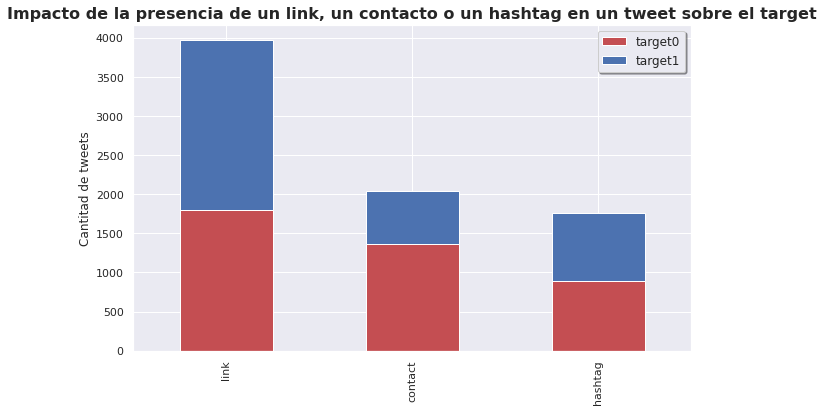

In [0]:
plot = df[['target0','target1']].plot(kind='bar', stacked=True, color=['r', 'b'])
plt.title('Impacto de la presencia de un link, un contacto o un hashtag en un tweet sobre el target', fontsize=16, fontweight='bold')
plt.legend(fontsize = 12, shadow=True)
plot.set_ylabel('Cantitad de tweets');


#Pregunta 6

In [0]:
flat_list = [item for sublist in df_tweetclean.text_clean.tolist() for item in sublist]
series = pd.Series( (v for v in flat_list) )
text = series.str.cat(sep=' ')

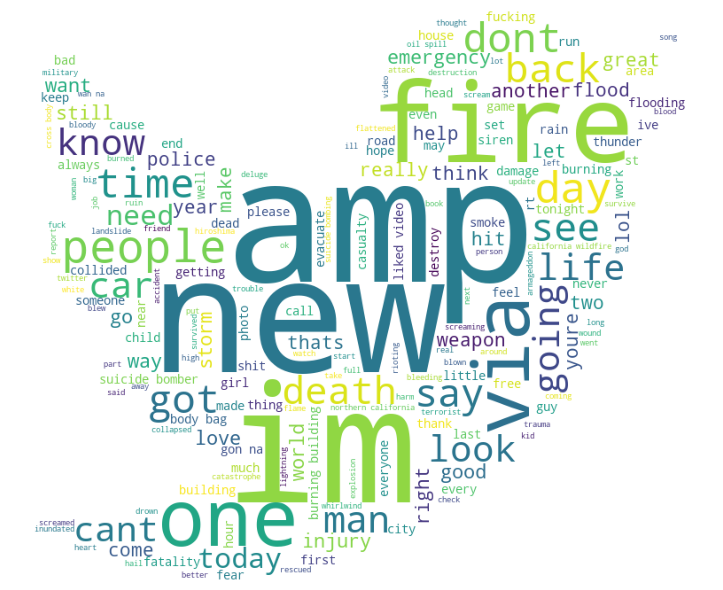

In [0]:
wave_mask1 = np.array(Image.open(requests.get('https://i7.pngguru.com/preview/71/985/185/computer-icons-logo-social-media-black-twitter.jpg', stream=True).raw))
generate_wordcloud(text, wave_mask1)